In [1]:
import numpy as np
import csv
import tensorflow as tf

In [46]:
path = '/home/gmd8si/Weakly_detector/data/kaggle256_val.csv'
trainfile = open(path, "rb")
reader = csv.reader(trainfile)

wpath = '/home/gmd8si/Weakly_detector/data/customKaggle256_val.csv'
wfile = open(wpath, 'wb')
writer = csv.writer(wfile, delimiter=',')
#trainset = sum(1 for row in reader)
#print trainset
count = 0
zero = 0
one = 0
two = 0
three= 0
four = 0

for row in reader:
    #if count <= 1000:
    if int(row[1]) == 1 and one <=200:
        writer.writerow([row[0],row[1]])
        one +=1
    elif int(row[1]) == 2 and two<=200:
        writer.writerow([row[0],row[1]])
        two +=1
    elif int(row[1]) == 3 and three <=200:
        writer.writerow([row[0],row[1]])
        three +=1
    elif int(row[1]) == 4 and four<=200:
        writer.writerow([row[0],row[1]])
        four +=1
        
    elif count % 5 == 0 and count % 2 == 0 and zero <=200:
        writer.writerow([row[0],row[1]])
        zero +=1

    if zero ==200 and four == 200:
        break
trainfile.close()

In [54]:
count =0
path = '/home/gmd8si/Weakly_detector/data/customKaggle256_val.csv'
trainfile = open(path, "rb")
reader = csv.reader(trainfile)
#trainset = sum(1 for row in reader)
#print trainset
#count = 0
for row in reader:
    if (int(row[1]) == 0):
        count +=1
    #print int(row[1])
print count


201


In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
    '''
    for r in range(im.shape[0]):
        if np.any(im[r,:,:]>1):
            rowStart = r
            break
    for r in range(im.shape[0]-1,0,-1):
        if np.any(im[r,:,:]>1):
            rowStop = r
            break
    for c in range(im.shape[1]):
        if np.any(im[:,c,:]>1):
            colStart = c
            break
    for c in range(im.shape[1]-1,0,-1):
        if np.any(im[:,c,:]>1):
            colStop = c
            break
        
    im_crop = im[rowStart:rowStop+1,colStart:colStop+1,:]
    '''

In [77]:
im_content = tf.read_file('/opt/dl/data/retinopathy/kaggle256/16_left.jpeg')
train_image = tf.image.decode_jpeg(im_content, channels=3)
train_image = tf.cast(train_image, tf.float32) / 255. # could be unnecessary
size = tf.cast([512, 512], tf.int32)
im = tf.image.resize_images(train_image, size)
print im.get_shape().as_list()[0]
#for r in range((im.get_shape().as_list())[0]):
    #if np.any(im[r,:,:]>1):
    #    rowStart = r
    #    break
    #a = tf.greater(im[r,:,:], 1)
    #if a 
    #if tf.greater(im[r,:,:], 1):
    #    print r
    
#for r in range(im.shape[0]-1,0,-1):
#    if np.any(im[r,:,:]>1):
#        rowStop = r
#        break
#for c in range(im.shape[1]):
#    if np.any(im[:,c,:]>1):
#        colStart = c
#        break
#for c in range(im.shape[1]-1,0,-1):
#    if np.any(im[:,c,:]>1):
#        colStop = c
#        break

#print r
#def crop_image(image):
    
    

512


In [208]:
def augment(image):

    # Randomly flip the image horizontally.
    distorted_image = tf.image.random_flip_left_right(image)
    distorted_image = tf.image.random_flip_up_down(distorted_image)

    # Because these operations are not commutative, consider randomizing
    # the order their operation.
    #distorted_image = tf.image.random_brightness(distorted_image, max_delta=0.05)
    distorted_image = tf.image.random_contrast(distorted_image, lower=0.4, upper=1.0)

    # Subtract off the mean and divide by the variance of the pixels.
    #distorted_image = tf.image.per_image_whitening(distorted_image)
    distorted_image = tf.image.central_crop(distorted_image, 0.95)
    
    return distorted_image

256
(256, 256, 3)


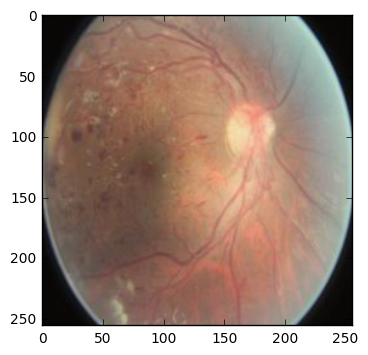

In [212]:
im_content = tf.read_file('/opt/dl/data/retinopathy/kaggle256/16_left.jpeg')
train_image = tf.image.decode_jpeg(im_content, channels=3)
#train_image = crop_image(train_image)   # Will do it again
train_image = tf.cast(train_image, tf.float32) / 255. # could be unnecessary
#size = tf.cast([256, 256], tf.int32)
#train_image = tf.image.resize_images(train_image, size)
#train_image = tf.image.per_image_whitening(train_image)
train_image = augment(train_image)
size = tf.cast([256, 256], tf.int32)
train_image = tf.image.resize_images(train_image, size)
print (train_image.get_shape().as_list())[0]
print train_image.get_shape()
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    image = sess.run(train_image)
    
plt.imshow(image)

In [2]:
import numpy as np
import csv
import tensorflow as tf

In [16]:
count =0
path = '/home/gmd8si/Weakly_detector/data/customKaggle256_test.csv'
trainfile = open(path, "rb")
reader = csv.reader(trainfile)

wpath = '/home/gmd8si/Weakly_detector/data/customKaggle128_test.csv'
wfile = open(wpath, 'wb')
writer = csv.writer(wfile, delimiter=',')

for row in reader:
    old = str(row[0])
    new = old.replace('kaggle256','kaggle128')
    writer.writerow([new,row[1]])
    #print old
trainfile.close()